In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor

In [2]:
#load data
mydata = pd.read_csv('merged_data.csv')

In [3]:
#look at data
mydata


,Unnamed: 0,Year,Month,ISHMT,discharge_rate,date,County,PM2.5,PM10
0,0,2020,6,Acute upper respiratory infections & influenza...,0.020226,2020-06-01,Cork,2.449595,4.925600
1,1,2020,7,Acute upper respiratory infections & influenza...,0.023597,2020-07-01,Cork,2.918698,8.976464
2,2,2020,8,Acute upper respiratory infections & influenza...,0.038767,2020-08-01,Cork,5.503203,11.047632
3,3,2020,9,Acute upper respiratory infections & influenza...,0.062364,2020-09-01,Cork,5.348747,11.373366
4,4,2020,10,Acute upper respiratory infections & influenza...,0.038767,2020-10-01,Cork,6.587163,12.050000
...,...,...,...,...,...,...,...,...,...
597,597,2023,8,Pneumonia (J12-J18),0.190482,2023-08-01,Dublin,4.065971,8.849873
598,598,2023,9,Pneumonia (J12-J18),0.179160,2023-09-01,Dublin,7.197300,13.106326
599,599,2023,10,Pneumonia (J12-J18),0.238436,2023-10-01,Dublin,6.902304,13.438059
600,600,2023,11,Pneumonia (J12-J18),0.265743,2023-11-01,Dublin,7.755754,13.776940


In [4]:
#look at structure
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      602 non-null    int64  
 1   Year            602 non-null    int64  
 2   Month           602 non-null    int64  
 3   ISHMT           602 non-null    object 
 4   discharge_rate  602 non-null    float64
 5   date            602 non-null    object 
 6   County          602 non-null    object 
 7   PM2.5           602 non-null    float64
 8   PM10            602 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 42.5+ KB


In [5]:
#drop first col not needed
mydata.drop(mydata.columns[0], axis=1, inplace=True)

In [6]:
mydata

,Year,Month,ISHMT,discharge_rate,date,County,PM2.5,PM10
0,2020,6,Acute upper respiratory infections & influenza...,0.020226,2020-06-01,Cork,2.449595,4.925600
1,2020,7,Acute upper respiratory infections & influenza...,0.023597,2020-07-01,Cork,2.918698,8.976464
2,2020,8,Acute upper respiratory infections & influenza...,0.038767,2020-08-01,Cork,5.503203,11.047632
3,2020,9,Acute upper respiratory infections & influenza...,0.062364,2020-09-01,Cork,5.348747,11.373366
4,2020,10,Acute upper respiratory infections & influenza...,0.038767,2020-10-01,Cork,6.587163,12.050000
...,...,...,...,...,...,...,...,...
597,2023,8,Pneumonia (J12-J18),0.190482,2023-08-01,Dublin,4.065971,8.849873
598,2023,9,Pneumonia (J12-J18),0.179160,2023-09-01,Dublin,7.197300,13.106326
599,2023,10,Pneumonia (J12-J18),0.238436,2023-10-01,Dublin,6.902304,13.438059
600,2023,11,Pneumonia (J12-J18),0.265743,2023-11-01,Dublin,7.755754,13.776940


## Linear Regression

In [7]:
#convert categorical variables
mydata_2022_encoded = pd.get_dummies(mydata, columns=['ISHMT', 'County'], drop_first=True)

In [8]:
mydata_model = mydata_2022_encoded

#get rid of date it is not needed
mydata_model = mydata_model.drop(columns=['date'])

#sort X (features) and y (target)
X = mydata_model.drop(columns=['discharge_rate'])
y = mydata_model['discharge_rate']

#split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#normalise the data - and fit to train and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#predict on the test set
y_pred = model.predict(X_test_scaled)

#evaluate the model using 'mean squared error' (mse)
mse = mean_squared_error(y_test, y_pred)

#outputs
print(f"Mean Squared Error: {mse:.5f}")
print(f"Intercept: {model.intercept_}")
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

#keep original feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

#add intercept
X_train_sm = sm.add_constant(X_train_scaled_df)

#fit the model and print summary
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

Mean Squared Error: 0.00255
Intercept: 0.13310576836104587
Root Mean Squared Error (RMSE): 0.050522832619240766
Mean Absolute Error (MAE): 0.03436091118932831
                            OLS Regression Results                            
Dep. Variable:         discharge_rate   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     45.02
Date:                Thu, 15 May 2025   Prob (F-statistic):           1.20e-63
Time:                        21:44:08   Log-Likelihood:                 698.58
No. Observations:                 421   AIC:                            -1373.
Df Residuals:                     409   BIC:                            -1325.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                   

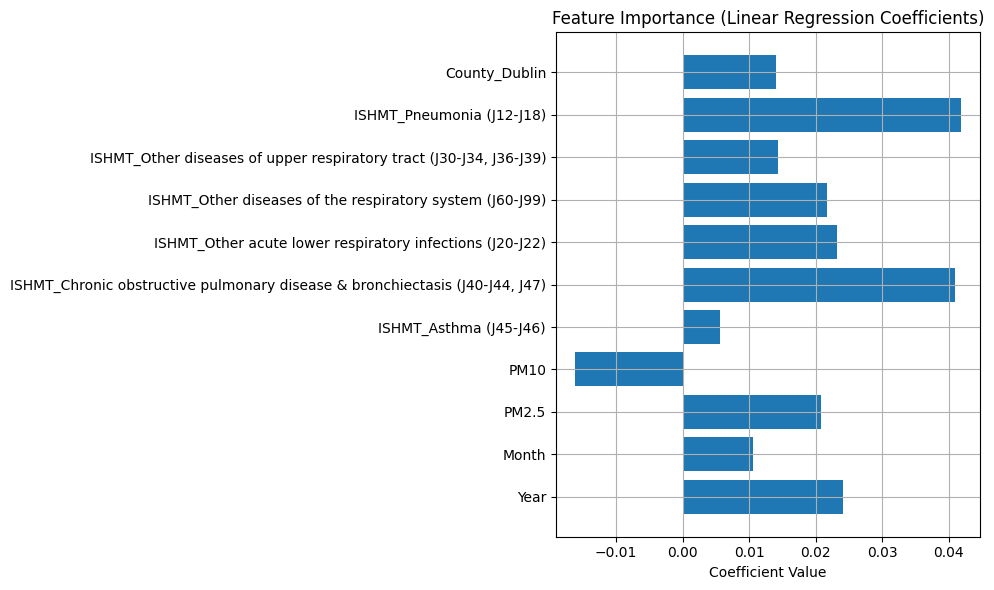

In [9]:
#feature importance from linear regression
feature_names = X.columns
coefficients = model.coef_

#show it on a plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()

##### drop the non-significant features

In [10]:
#get rid of pm2.5 and pm10 for the COVID version
mydata_model = mydata_model.drop(columns=['PM10','ISHMT_Asthma (J45-J46)'])

#sort X (features) and y (target)
X = mydata_model.drop(columns=['discharge_rate'])
y = mydata_model['discharge_rate']

#split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#normalise the data - and fit to train and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train the model
model_drop = LinearRegression()
model_drop.fit(X_train_scaled, y_train)

#predict on the test set
y_pred = model_drop.predict(X_test_scaled)

#evaluate the model using 'mean squared error' (mse)
mse = mean_squared_error(y_test, y_pred)

#outputs
print(f"Mean Squared Error: {mse:.5f}")
print(f"Intercept: {model_drop.intercept_}")
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

#keep original feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

#add intercept
X_train_sm = sm.add_constant(X_train_scaled_df)

#fit the model and print summary
ols_model_drop = sm.OLS(y_train, X_train_sm).fit()
print(ols_model_drop.summary())

Mean Squared Error: 0.00258
Intercept: 0.1331057683610459
Root Mean Squared Error (RMSE): 0.05075260695514814
Mean Absolute Error (MAE): 0.034868153688396616
                            OLS Regression Results                            
Dep. Variable:         discharge_rate   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     53.03
Date:                Thu, 15 May 2025   Prob (F-statistic):           2.10e-63
Time:                        21:44:17   Log-Likelihood:                 693.83
No. Observations:                 421   AIC:                            -1368.
Df Residuals:                     411   BIC:                            -1327.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                    

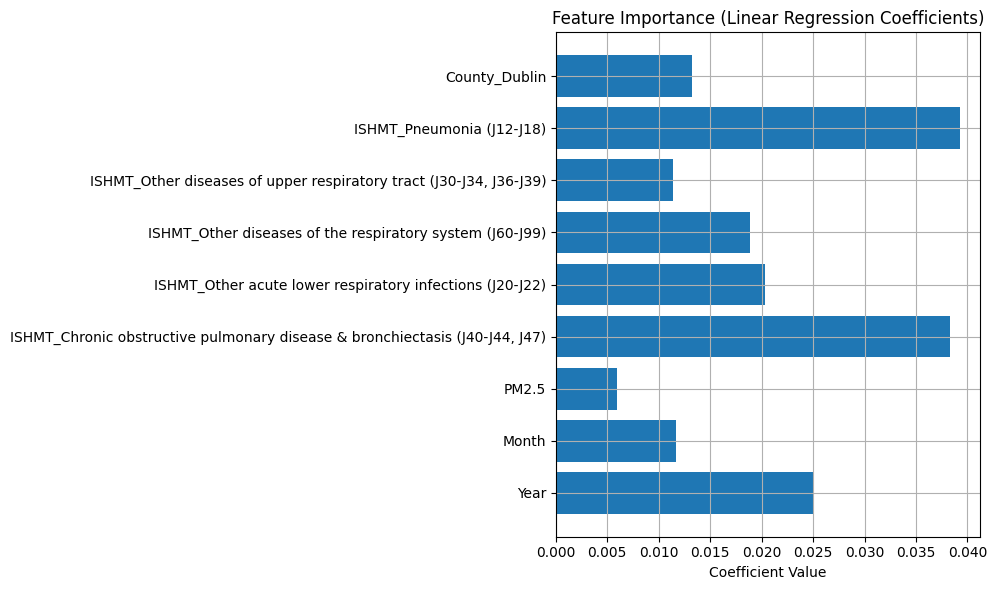

In [11]:
#feature importance from linear regression
feature_names = X.columns
coefficients = model_drop.coef_

#show it on a plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
#cross validation
scores = cross_val_score(model_drop, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(f"Average RMSE: {-scores.mean():.2f}")

r2_scores = cross_val_score(model_drop, X, y, cv=5, scoring='r2')
#print individual scores and average
print("R² scores for each fold:", r2_scores)
print(f"Average R²: {np.mean(r2_scores):.3f}")

dummy = DummyRegressor(strategy="mean")
baseline_r2 = cross_val_score(dummy, X, y, cv=5, scoring='r2')
print("Baseline R² (Dummy Regressor):", baseline_r2.mean())
print(X.corrwith(y))

Average RMSE: 0.07
R² scores for each fold: [ 0.18828896  0.66953944 -0.21491282 -2.37764118 -1.81750674]
Average R²: -0.710
Baseline R² (Dummy Regressor): -0.7592788644041222
Year                                                                           0.281860
Month                                                                          0.075986
PM2.5                                                                          0.071446
ISHMT_Chronic obstructive pulmonary disease & bronchiectasis (J40-J44, J47)    0.328724
ISHMT_Other acute lower respiratory infections (J20-J22)                       0.046442
ISHMT_Other diseases of the respiratory system (J60-J99)                      -0.009005
ISHMT_Other diseases of upper respiratory tract (J30-J34, J36-J39)            -0.141295
ISHMT_Pneumonia (J12-J18)                                                      0.402188
County_Dublin                                                                  0.163729
dtype: float64


In [14]:
#0.538 looks ok on OLS model on full data but on cross validation its not generalising properly..
#looks like this is not a linear model (and maybe too many dummy variables are the issue with the ISHMT categories)

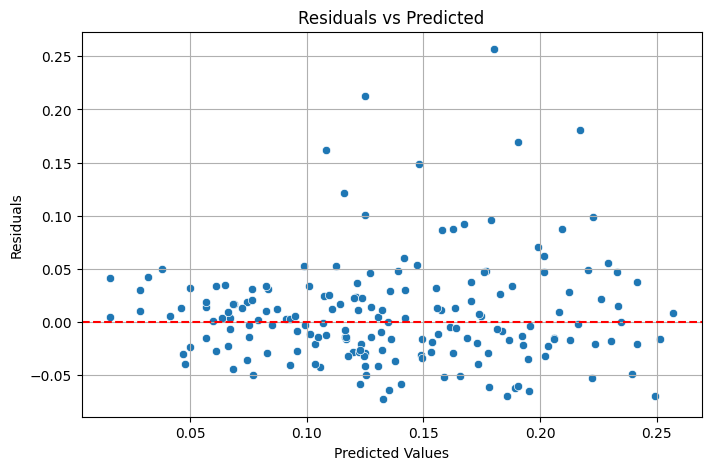

In [17]:
#look at residuals  vs predicted (check for homoscedasity and patterns)
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()


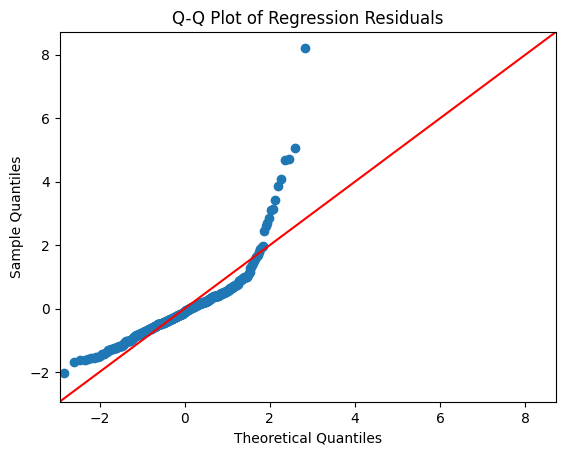

In [18]:
# Get the residuals from your fitted OLS model
residuals = ols_model_drop.resid

# Create a Q-Q plot
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Regression Residuals')
plt.show()

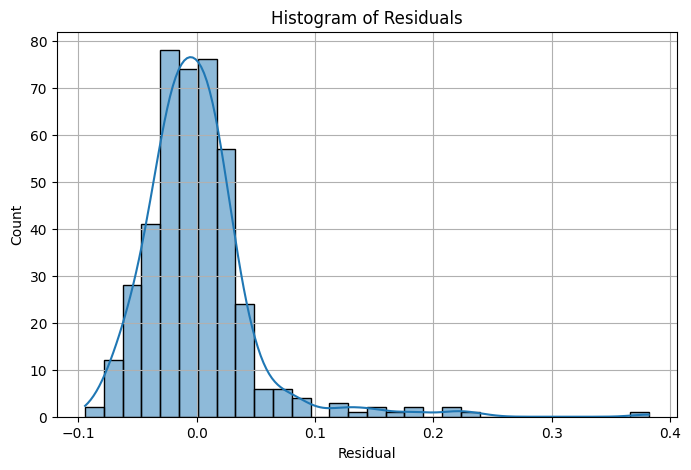

In [19]:
#plot histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.grid(True)
plt.show()


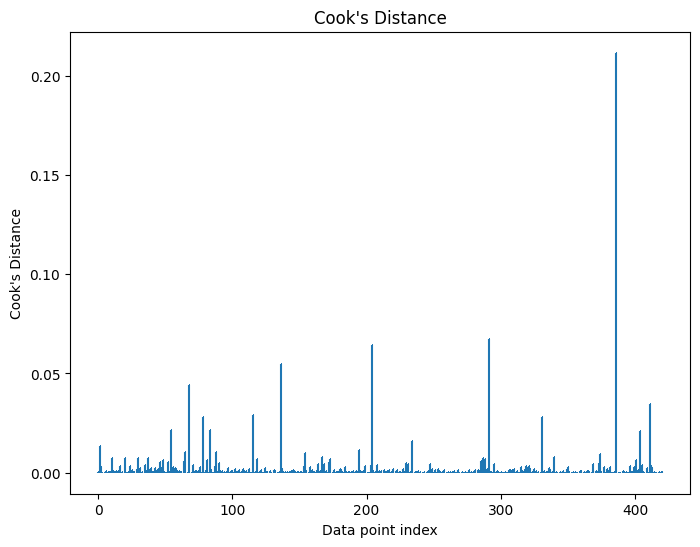

In [20]:
# Add a constant term to the features (intercept)
X_train_sm = sm.add_constant(X_train_scaled_df)

# Fit the OLS model (ensuring the indices align with y_train)
ols_model_post_drop = sm.OLS(y_train, X_train_sm).fit()

# Get the influence object which contains the Cook's Distance
influence = ols_model_post_drop.get_influence()
cooks_d = influence.cooks_distance[0]

# Plot Cook's Distance
plt.figure(figsize=(8, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", basefmt=" ")
plt.title("Cook's Distance")
plt.xlabel("Data point index")
plt.ylabel("Cook's Distance")
plt.show()

C:\Users\lsmyth\AppData\Local\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lsmyth\AppData\Local\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted PM2.5 level in 2035: 8.19
Predicted Discharge Rate in 2035: 0.38


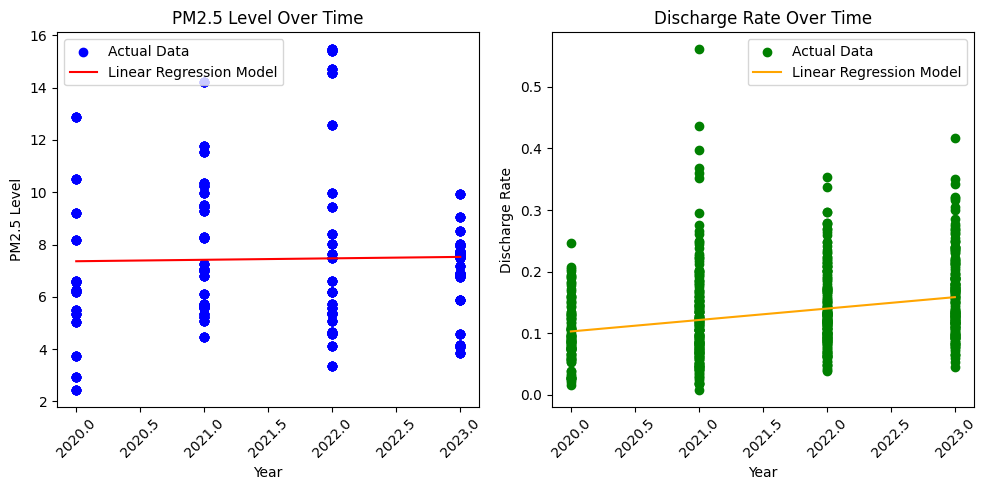

In [21]:
#features and targets (going to predict on year and look at pm2.5 and discharge_rate
X = mydata[['Year']]
y_pm25 = mydata['PM2.5']
y_discharge = mydata['discharge_rate']

#train and test split
X_train, X_test, y_train_pm25, y_test_pm25 = train_test_split(X, y_pm25, test_size=0.3, random_state=42)
X_train, X_test, y_train_discharge, y_test_discharge = train_test_split(X, y_discharge, test_size=0.3, random_state=42)

#train the model for PM2.5
pm25_model = LinearRegression()
pm25_model.fit(X_train, y_train_pm25)

#train the model for discharge_rate
discharge_model = LinearRegression()
discharge_model.fit(X_train, y_train_discharge)

#predict for 2035
year_2035 = np.array([[2035]])
pm25_2035 = pm25_model.predict(year_2035)
discharge_2035 = discharge_model.predict(year_2035)

#print predictions
print(f"Predicted PM2.5 level in 2035: {pm25_2035[0]:.2f}")
print(f"Predicted Discharge Rate in 2035: {discharge_2035[0]:.2f}")

#plot
plt.figure(figsize=(10, 5))

#PM2.5 prediction plot
plt.subplot(1, 2, 1)
plt.scatter(mydata['Year'], mydata['PM2.5'], color='blue', label='Actual Data')
plt.plot(mydata['Year'], pm25_model.predict(mydata[['Year']]), color='red', label='Linear Regression Model')
plt.xlabel('Year')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 Level Over Time')
plt.xticks(rotation=45)
plt.legend()

#discharge_rate prediction plot
plt.subplot(1, 2, 2)
plt.scatter(mydata['Year'], mydata['discharge_rate'], color='green', label='Actual Data')
plt.plot(mydata['Year'], discharge_model.predict(mydata[['Year']]), color='orange', label='Linear Regression Model')
plt.xlabel('Year')
plt.ylabel('Discharge Rate')
plt.title('Discharge Rate Over Time')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [23]:
#compare models
models = {
    "Model A": ols_model,
    "Model B": ols_model_drop,
}

results = []

for name, model in models.items():
    results.append({
        'Model': name,
        'R-squared': model.rsquared,
        'Adj. R-squared': model.rsquared_adj,
        'AIC': model.aic,
        'BIC': model.bic,
        'F-statistic': model.fvalue,
        'F-test p-value': model.f_pvalue
    })

df_results = pd.DataFrame(results)
print(df_results.sort_values(by='Adj. R-squared', ascending=False))

     Model  R-squared  Adj. R-squared          AIC          BIC  F-statistic  \
0  Model A   0.547651        0.535485 -1373.167537 -1324.655943    45.015432   
1  Model B   0.537320        0.527188 -1367.660219 -1327.233891    53.033625   

   F-test p-value  
0    1.204458e-63  
1    2.104389e-63  
